In [1]:
import os
import re
import pickle

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc


In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [32]:
import mushroom.utils as utils
import mushroom.visualization.utils as vis_utils

In [6]:
outputs = np.load('/data/estorrs/mushroom/data/projects/submission_v1/HT397B1/mushroom/outputs.npy', allow_pickle=True).flat[0]
outputs.keys()

dict_keys(['section_positions', 'section_ids', 'dtype_to_volume', 'dtype_to_volume_probs', 'dtype_to_clusters', 'dtype_to_cluster_probs', 'dtype_to_cluster_probs_all', 'dtype_to_cluster_intensities'])

In [13]:
probs = outputs['dtype_to_volume_probs']['visium']
len(probs), probs[0].shape

(31, (84, 84, 18))

In [14]:
x = probs[0]
x.shape

(84, 84, 18)

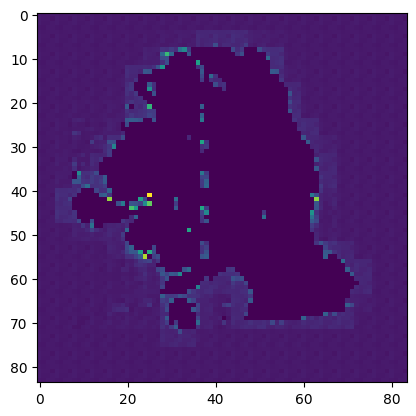

In [15]:
plt.imshow(x[..., 0])

In [23]:
import torch
import torchvision.transforms.functional as TF
from einops import rearrange

In [24]:
upscale = 10.
upscaled = utils.rescale(x, scale=upscale, dim_order='h w c', target_dtype=probs.dtype, )
upscaled.shape

(840, 840, 18)

In [27]:
kernel_size = int(upscale) if int(upscale) % 2 != 0 else int(upscale) - 1
blurred = rearrange(TF.gaussian_blur(
    torch.tensor(rearrange(upscaled, 'h w c -> c h w')), kernel_size=kernel_size
), 'c h w -> h w c').numpy()
blurred.shape

(840, 840, 18)

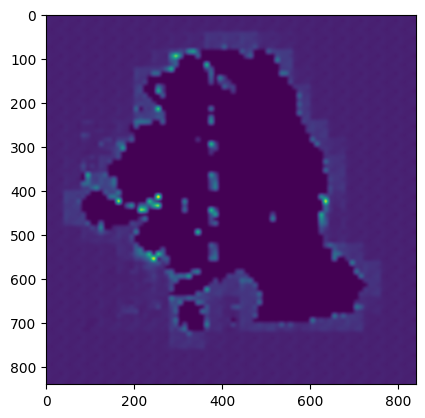

In [28]:
plt.imshow(blurred[..., 0])

In [31]:
upscaled_clusters = blurred.argmax(-1)
upscaled_clusters.shape

(840, 840)

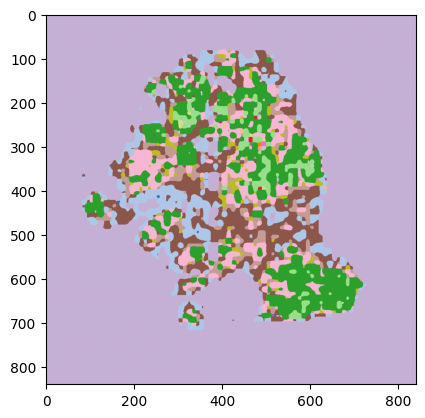

In [34]:
rgb = vis_utils.display_labeled_as_rgb(upscaled_clusters, preserve_indices=True)
plt.imshow(rgb)